##  Import the libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


##  Load and Explore Dataset

In [50]:
# Loading the dataset
data = pd.read_csv('bank-additional.csv', sep=';')

In [51]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [52]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [53]:
data.shape

(4119, 21)

##  Visualize Target Variable

/var/folders/73/5fmc0w6n53xc87fvnvq_672c0000gn/T/ipykernel_96545/830997487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='y', palette='viridis')  # Replace 'target variable' with the actual column name


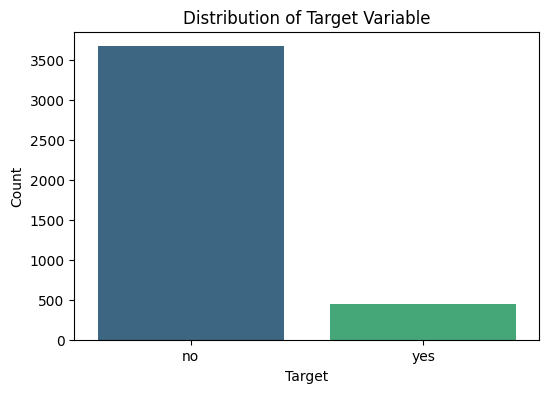

No: 89.05%, Yes: 10.95%


In [54]:
# Target variable density graph
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='y', palette='viridis')  # Replace 'target variable' with the actual column name
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Calculating "Yes" and "No" rates
target_counts = data['y'].value_counts(normalize=True) * 100
print(f"No: {target_counts.get('no', 0):.2f}%, Yes: {target_counts.get('yes', 0):.2f}%")


##  Visualize Numerical Features

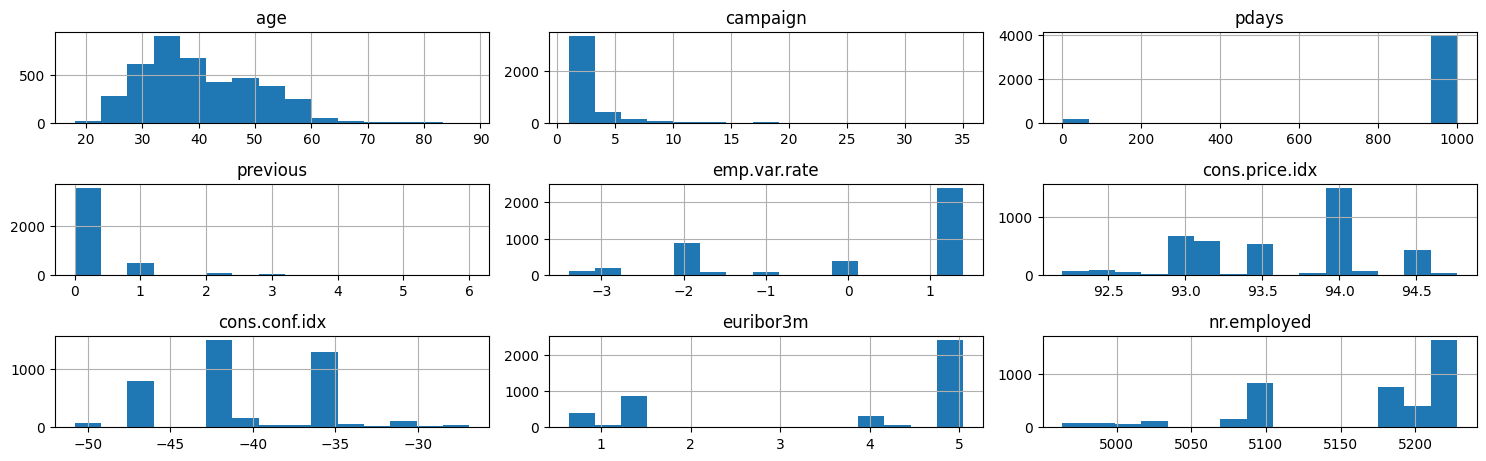

In [55]:
# List of numerical columns to plot
numeric_columns = ['age', 'campaign', 'pdays', 'previous',
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed']


# Plot histograms for the columns in numerical_cols
data[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(4, 3))
plt.tight_layout()
plt.show()

## Boxplots for Numerical Features by Target Variable

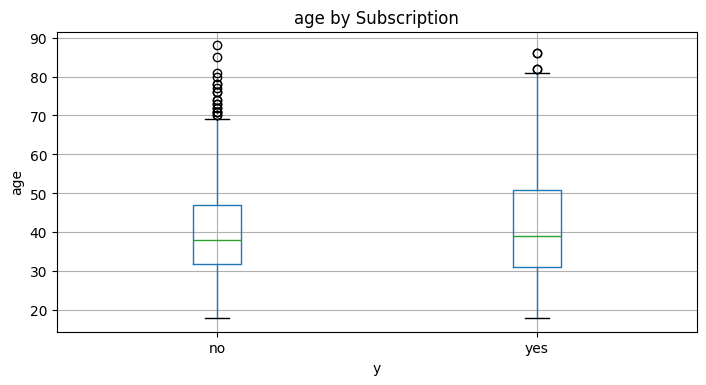

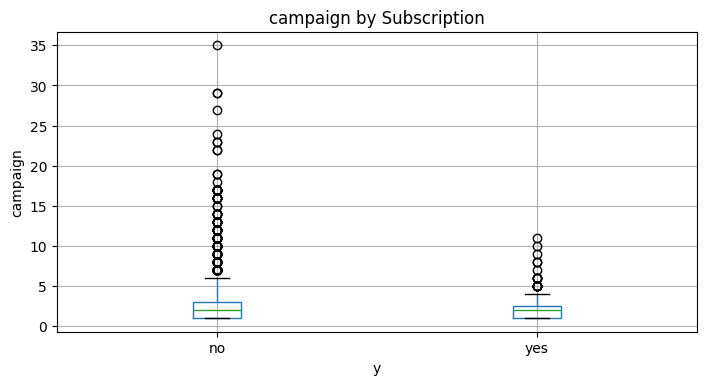

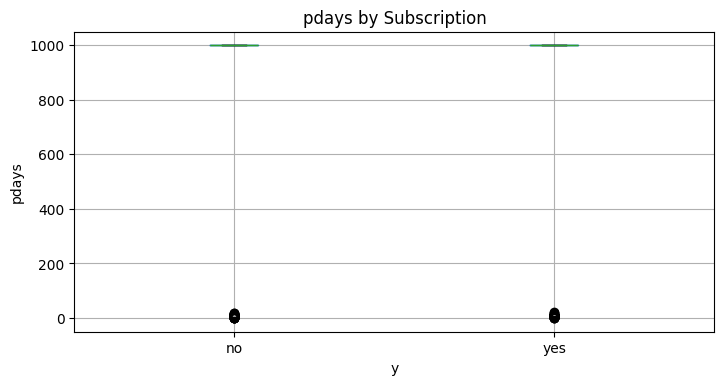

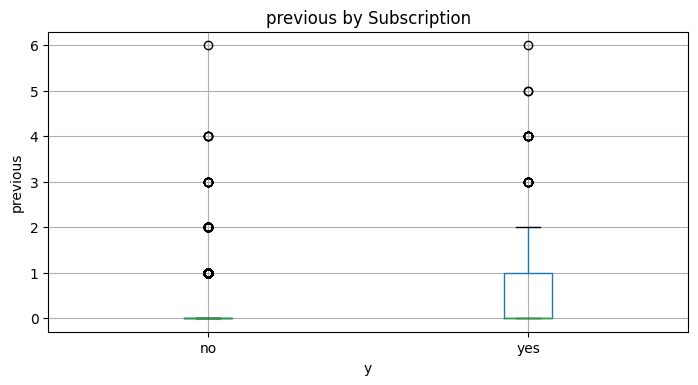

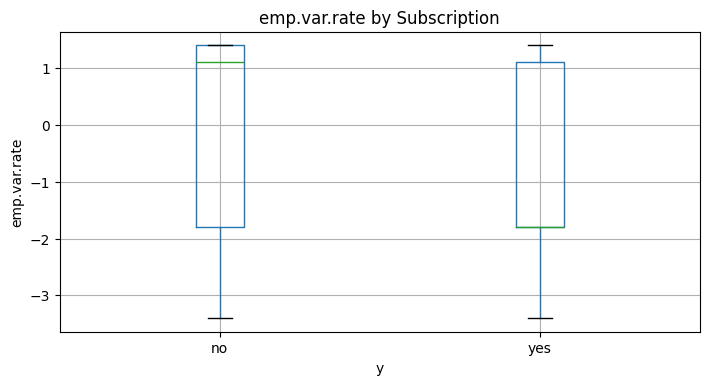

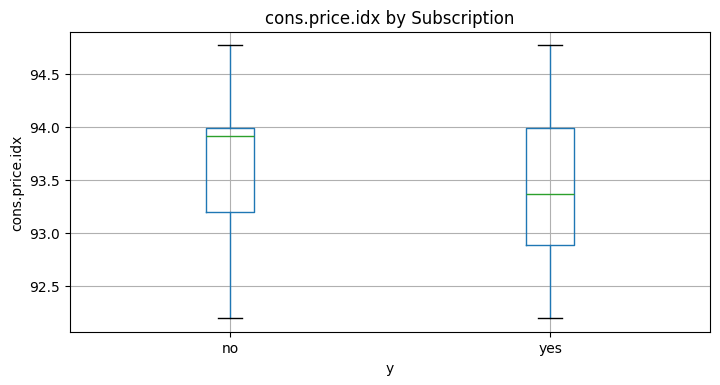

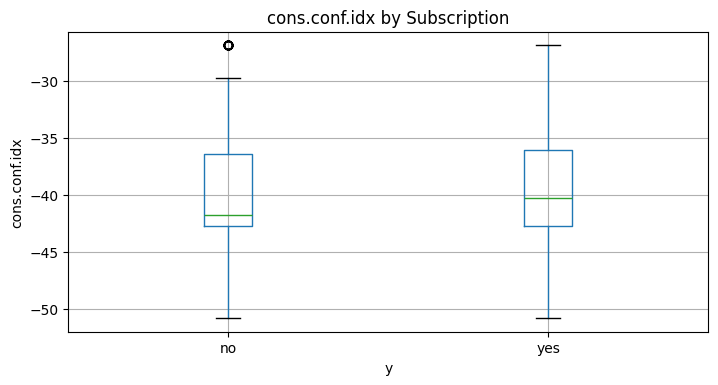

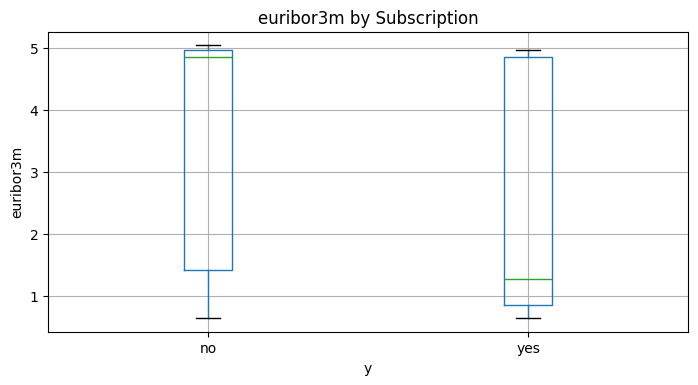

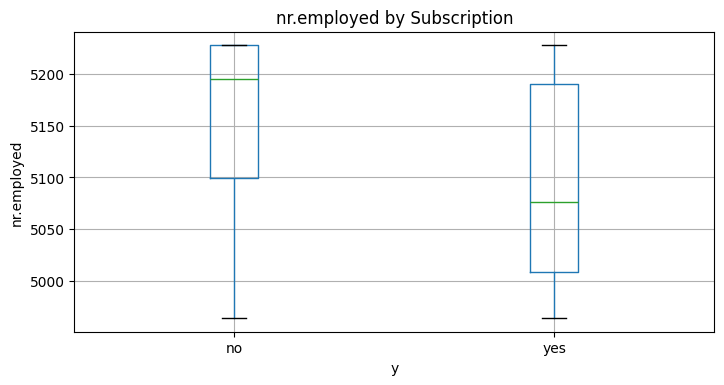

In [56]:
# Boxplots for numeric features by target variable
for col in numeric_columns:
    data.boxplot(column=col, by='y', figsize=(8, 4))
    plt.title(f"{col} by Subscription")
    plt.suptitle('')  # That's to remove the default 'Boxplot grouped by y' title
    plt.ylabel(col)
    plt.show()

In [57]:
# General information and missing data control
print("Dataset general information:")
print(data.info())


Dataset general information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons

## Dataset Information and Missing Data Analysis

In [58]:

print("\nNumber of missing data:")
print(data.isnull().sum())



Number of missing data:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


 ## Feature Engineering: Categorizing and Reordering Columns

In [59]:
def categorize_month(month):
    if month in ['jan', 'feb', 'mar']:
        return 'q1'
    elif month in ['apr', 'may', 'jun']:
        return 'q2'
    elif month in ['jul', 'aug', 'sep']:
        return 'q3'
    elif month in ['oct', 'nov', 'dec']:
        return 'q4'

# Create the column
data['quarter'] = data['month'].apply(categorize_month)

# To reorder the columns, move column 'quarter' to row 2
columns = list(data.columns)
columns.insert(8, columns.pop(columns.index('quarter')))
data = data[columns]

# Remove column 'month'
data.drop(columns=['month'], inplace=True)


## Visualize Categorical Features

/var/folders/73/5fmc0w6n53xc87fvnvq_672c0000gn/T/ipykernel_96545/1765501370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
/var/folders/73/5fmc0w6n53xc87fvnvq_672c0000gn/T/ipykernel_96545/1765501370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
/var/folders/73/5fmc0w6n53xc87fvnvq_672c0000gn/T/ipykernel_96545/1765501370.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
/var/folders/73/5fmc0w6n53xc87fvnv

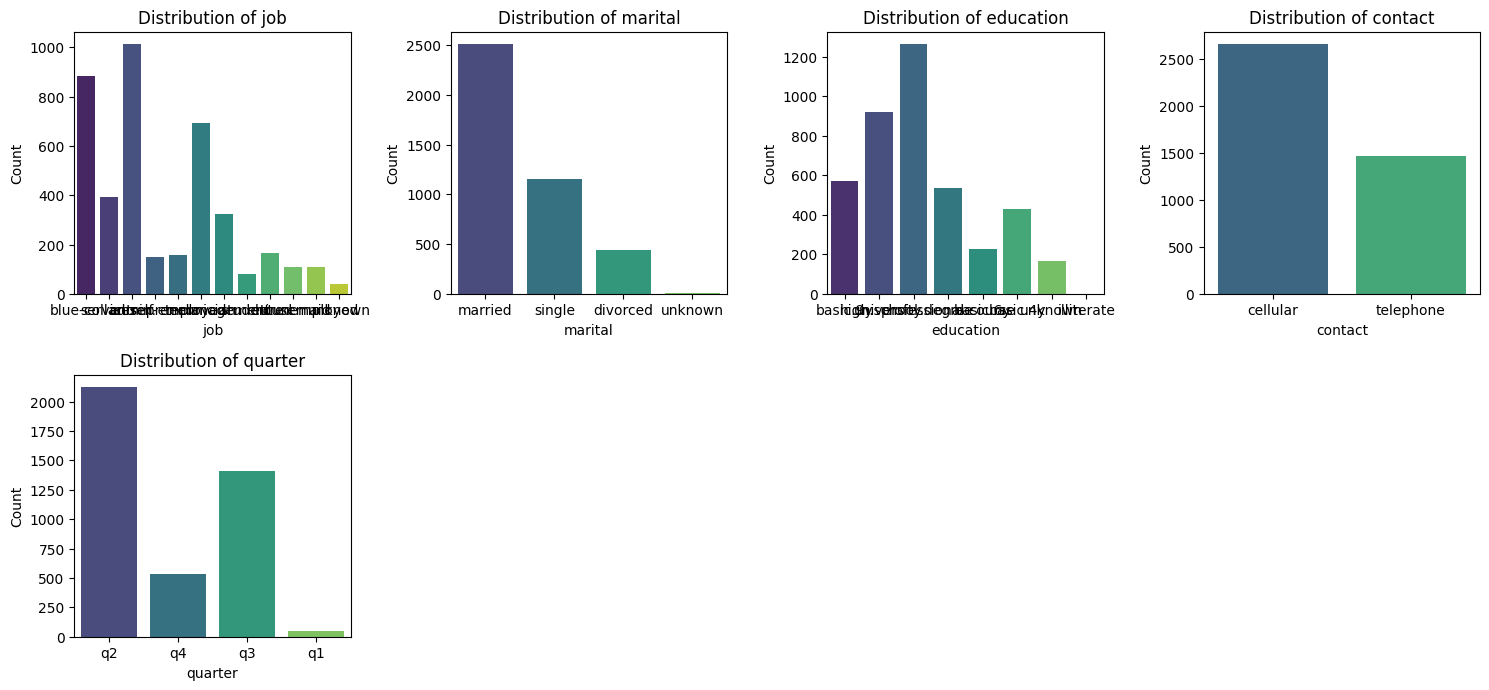

In [60]:
# Set up the matplotlib figure
categorical_columns = ['job', 'marital', 'education', 'contact', 'quarter']
plt.figure(figsize=(15, 10))

# Loop through each categorical feature and create a bar chart
for i, feature in enumerate(categorical_columns):
    plt.subplot(3, 4, i+1)  # 3 rows, 4 columns layout
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

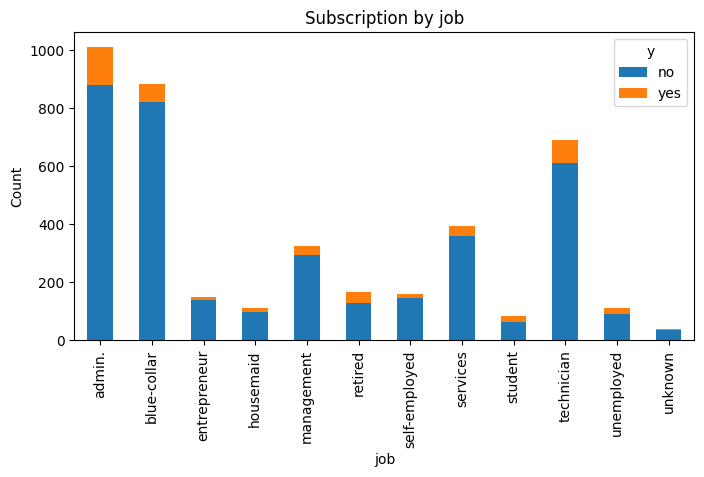

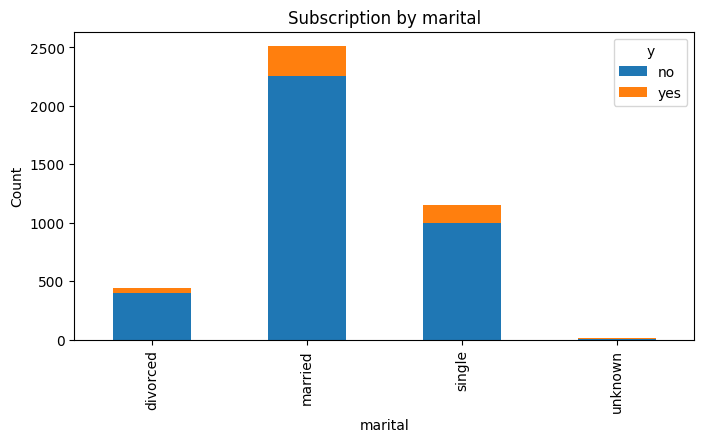

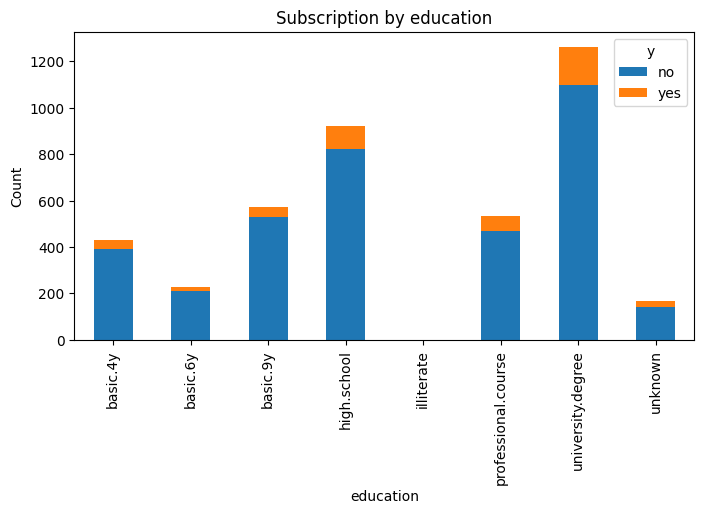

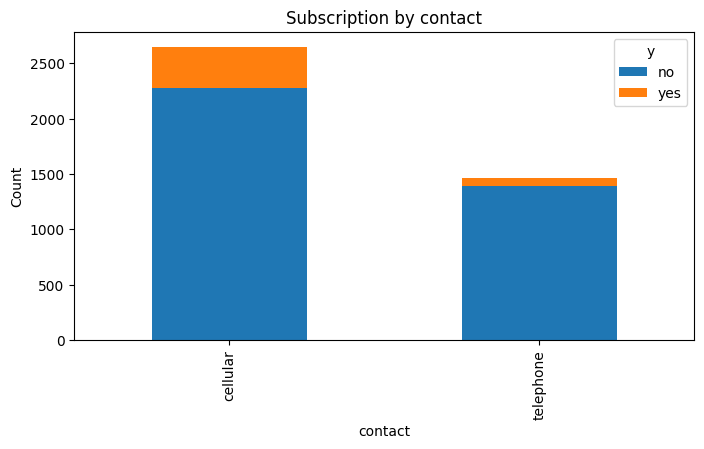

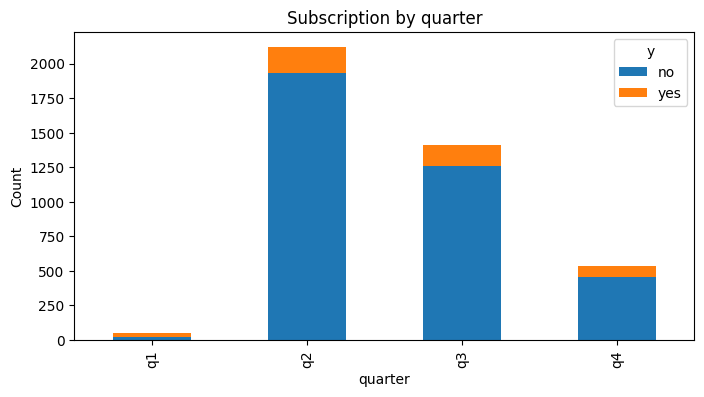

In [61]:
# Bar charts for key categorical features
for col in categorical_columns:
    pd.crosstab(data[col], data['y']).plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"Subscription by {col}")
    plt.ylabel('Count')
    plt.show()

## Handling Missing Data and Duplicates

In [62]:
# Fill or remove missing data
data.fillna("unknown", inplace=True) # Fill missing values with "unknown"
data = data.replace('unknown', np.nan) # Mark "unknown" values As missing data
data = data.replace('nonexistent', np.nan) # Mark "unknown" values as missing data
# Remove columns 'day_of_week' and 'duration' from the dataset
data = data.drop(columns=['day_of_week', 'duration', 'poutcome'], errors='ignore')

In [63]:
# Removing duplicate records
data.drop_duplicates(inplace=True)

## Outlier Detection and Handling

In [64]:
numeric_columns = ['age', 'campaign', 'pdays', 'previous',
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed']


from scipy.stats import zscore

# Outlier control with Z-score method
for col in numeric_columns:
    data['zscore'] = zscore(data[col])
    data = data[(data['zscore'] >= -3) & (data['zscore'] <= 3)] # Z-score limits
    data.drop(columns=['zscore'], inplace=True)
    
    
   # Limit values to lower 1% and upper 99%
for col in numeric_columns:
    lower_bound = data[col].quantile(0.01)  # Alt %1
    upper_bound = data[col].quantile(0.99)  # Üst %99
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


## Processing Categorical Features

In [65]:
# Checking categorical data and ensuring consistency
categorical_columns = ['job', 'marital', 'education', 'contact', 'quarter']

for col in categorical_columns:
    data[col] = data[col].astype(str).str.strip().str.lower()

In [66]:
binary_columns = ['default', 'housing', 'loan']


for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


## Define Preprocessing Pipelines

In [67]:
# Pipeline for numerical properties
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Fill missing values with average
    ('scaler', StandardScaler())  # Scaling the data
])


In [68]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'quarter']
for col in categorical_columns:
    data[col] = data[col].astype(str).str.strip().str.lower()

# Custom label encoding transformer for categorical data
class LabelEncodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoders = {col: LabelEncoder() for col in columns}
    
    def fit(self, X, y=None):
        for col in self.columns:
            self.encoders[col].fit(X[col])
            # Printing the given labels and their corresponding numeric values
            print(f"Encoder for '{col}':")
            for class_value, encoded_value in zip(self.encoders[col].classes_, self.encoders[col].transform(self.encoders[col].classes_)):
                print(f"  {class_value} -> {encoded_value}")
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.encoders[col].transform(X_copy[col])
        return X_copy

# You can use the pipeline where we update categorical columns and other encodings as shown above.

categorical_transformer = LabelEncodingTransformer(columns=categorical_columns)



In [69]:
# Pipeline for binary properties
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with mod
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))  # Binary coding
])


In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('bin', binary_transformer, binary_columns)
    ]
)


##  Label Encoding for Target Variable

In [71]:
# Target variable coding
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])  # 'yes' = 1, 'no' = 0

In [72]:
# Pipeline implementation
X = data.drop('y', axis=1)  #Features
y = data['y']  # Target value


In [73]:
# Transform properties
X_processed = preprocessor.fit_transform(X)

Encoder for 'job':
  admin. -> 0
  blue-collar -> 1
  entrepreneur -> 2
  housemaid -> 3
  management -> 4
  nan -> 5
  retired -> 6
  self-employed -> 7
  services -> 8
  student -> 9
  technician -> 10
  unemployed -> 11
Encoder for 'marital':
  divorced -> 0
  married -> 1
  nan -> 2
  single -> 3
Encoder for 'education':
  basic.4y -> 0
  basic.6y -> 1
  basic.9y -> 2
  high.school -> 3
  illiterate -> 4
  nan -> 5
  professional.course -> 6
  university.degree -> 7
Encoder for 'contact':
  cellular -> 0
  telephone -> 1
Encoder for 'quarter':
  q1 -> 0
  q2 -> 1
  q3 -> 2
  q4 -> 3


In [74]:
# Convert transformed data to pandas DataFrame
feature_names = (
    numeric_columns + binary_columns +  list(categorical_columns)
)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

In [75]:
X_processed_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,housing,loan,job,marital,education,contact,quarter
0,-1.035193,-0.180851,0.0,-0.330676,-1.373944,-1.258167,-1.316725,-1.538357,-1.279813,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
1,-0.081156,0.984842,0.0,-0.330676,0.584011,0.747046,1.025884,0.641295,0.218026,8.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0
2,-1.565213,-0.763697,0.0,-0.330676,0.786558,1.604863,-0.264941,0.707140,0.822703,8.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0
3,-0.187160,0.401996,0.0,-0.330676,0.786558,1.604863,-0.264941,0.705294,0.822703,8.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0
4,0.766876,-0.763697,0.0,-0.330676,-0.226177,-0.699038,-0.312750,0.232688,0.296259,0.0,1.0,7.0,0.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,-1.035193,-0.763697,0.0,-0.330676,0.786558,0.608630,-0.480079,0.704679,0.822703,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0
3699,-0.081156,-0.763697,0.0,-0.330676,0.786558,0.608630,-0.480079,0.705294,0.822703,0.0,1.0,3.0,1.0,2.0,0.0,1.0,0.0
3700,-1.353205,-0.180851,0.0,3.024104,-1.373944,-1.258167,-1.316725,-1.513126,-1.279813,9.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0
3701,1.932921,-0.763697,0.0,-0.330676,0.786558,-0.254650,1.097597,0.709602,0.822703,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0


## Feature Selection using RFE

In [76]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# We use RandomForestClassifier as sample model.
model = RandomForestClassifier(random_state=42)

# Feature selection with Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_processed, y)

# Selected features
selected_features = [feature for feature, rank in zip(feature_names, rfe.ranking_) if rank == 1]
print("Selected Features:")
print(selected_features)

# Creating a new dataset with selected features
X_selected = pd.DataFrame(X_processed, columns=feature_names)[selected_features]
X_selected.head()

Selected Features:
['age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'default', 'housing', 'loan', 'contact']


,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,housing,loan,contact
0,-1.035193,-0.180851,-1.258167,-1.316725,-1.538357,-1.279813,1.0,1.0,2.0,1.0
1,-0.081156,0.984842,0.747046,1.025884,0.641295,0.218026,8.0,3.0,3.0,0.0
2,-1.565213,-0.763697,1.604863,-0.264941,0.707140,0.822703,8.0,1.0,3.0,1.0
3,-0.187160,0.401996,1.604863,-0.264941,0.705294,0.822703,8.0,1.0,2.0,1.0
4,0.766876,-0.763697,-0.699038,-0.312750,0.232688,0.296259,0.0,1.0,7.0,1.0


## Balancing Dataset with SMOTE

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

print("New class distribution:")
print(pd.Series(y_resampled).value_counts())


New class distribution:
y
0    3399
1    3399
Name: count, dtype: int64


## Split Dataset into Train and Test Sets

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")


Training set size: (5438, 10)
Test seti boyutu: (1360, 10)


## Model Training and Hyperparameter Tuning

### Logistic Regression

In [79]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10],
    'solver': ['saga'],  # 'lbfgs' çıkarıldı
    'l1_ratio': [0.1, 0.5, 0.9]  # elasticnet için zorunlu
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=500),
                              param_grid=param_grid_lr, cv=5, scoring='roc_auc')

grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
print("Logistic Regression Best Params:", grid_search_lr.best_params_)

y_pred_lr = best_lr.predict(X_test)

# Performans değerlendirme
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


/Users/dilaraturkalp/Downloads/“Group_03” 2/bank_marketing_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dilaraturkalp/Downloads/“Group_03” 2/bank_marketing_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dilaraturkalp/Downloads/“Group_03” 2/bank_marketing_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dilaraturkalp/Downloads/“Group_03” 2/bank_marketing_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dilaraturkalp/Downloads/“Grou

Logistic Regression Best Params: {'C': 10, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Logistic Regression Accuracy: 0.6404411764705882
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       690
           1       0.66      0.56      0.61       670

    accuracy                           0.64      1360
   macro avg       0.64      0.64      0.64      1360
weighted avg       0.64      0.64      0.64      1360



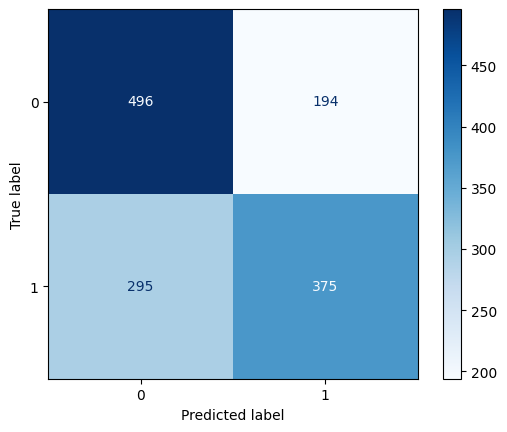

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr)
disp_lr.plot(cmap='Blues')


### Random Forest

In [85]:
# Random Forest for GridSearch
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(" Best Params:", grid_search_rf.best_params_)


y_pred_rf = best_rf.predict(X_test)

# Performance evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



 Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy: 0.9448529411764706
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       690
           1       0.96      0.93      0.94       670

    accuracy                           0.94      1360
   macro avg       0.95      0.94      0.94      1360
weighted avg       0.95      0.94      0.94      1360



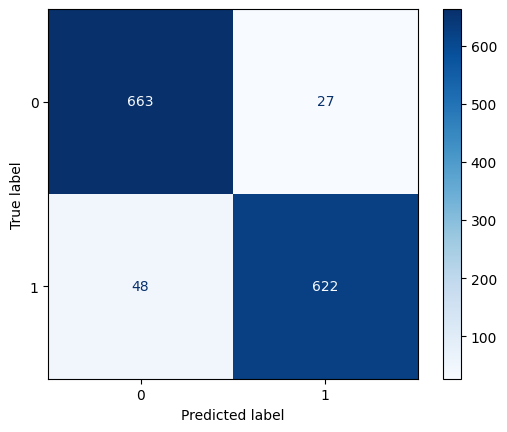

In [86]:
# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap='Blues')


### Gradient Boosting

In [87]:
# Gradient Boosting for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print("Gradient Boosting Best Params:", grid_search_gb.best_params_)

y_pred_gb = best_gb.predict(X_test)

# Performance evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Accuracy: 0.9448529411764706
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       690
           1       0.96      0.92      0.94       670

    accuracy                           0.94      1360
   macro avg       0.95      0.94      0.94      1360
weighted avg       0.95      0.94      0.94      1360



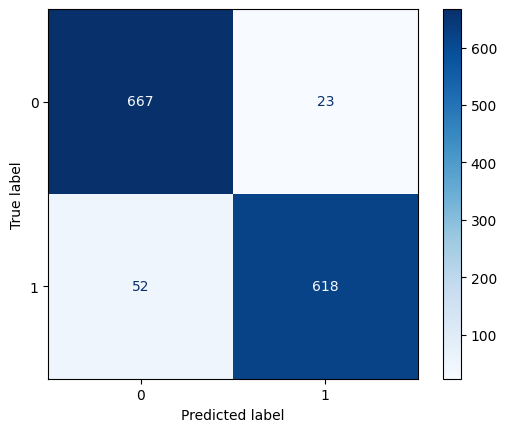

In [88]:
# Gradient Boosting Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display confusion matrix for Gradient Boosting
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb)
disp_gb.plot(cmap='Blues')


### Support Vector Classifier

In [89]:
# Support Vector Classifier for GridSearch
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(SVC(random_state=42, probability=True),
                               param_grid=param_grid_svc, cv=3, scoring='roc_auc')
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_
print("SVC Best Params:", grid_search_svc.best_params_)


y_pred_svc = best_svc.predict(X_test)

# Performance evaluation
print(" SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

KeyboardInterrupt: 

In [ ]:
# SVC Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Display confusion matrix for SVC
disp_svc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svc)
disp_svc.plot(cmap='Blues')


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

# Creating Voting Classifier with optimized models
optimized_ensemble_model = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('rf', best_rf),
    ('gb', best_gb),
    ('svc', best_svc)
], voting='soft')




In [ ]:
# Train the model
optimized_ensemble_model.fit(X_train, y_train)


In [ ]:

# Making predictions on the test set
y_pred = optimized_ensemble_model.predict(X_test)
y_prob = optimized_ensemble_model.predict_proba(X_test)[:, 1]

# Performance evaluation
from sklearn.metrics import classification_report, roc_auc_score

print("Optimized Voting Classifier Performansı:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
y_true = y_test
y_pred = optimized_ensemble_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# ROC Curve
y_prob = optimized_ensemble_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Evaluate and Compare Model Performance

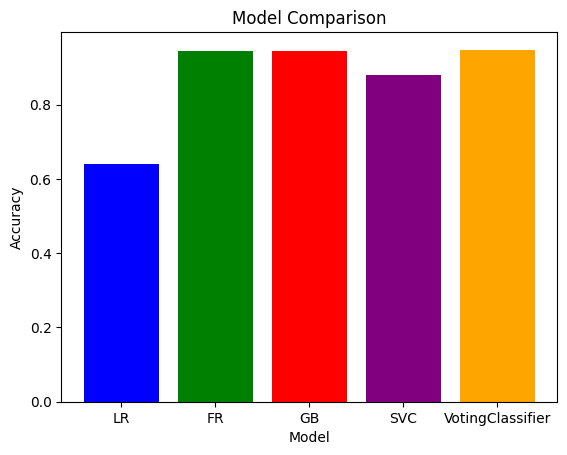

In [45]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracies = {
    'LR': accuracy_score(y_test, y_pred_lr),
    'FR': accuracy_score(y_test, y_pred_rf),
    'GB': accuracy_score(y_test, y_pred_gb),
    'SVC': accuracy_score(y_test, y_pred_svc),
    'VotingClassifier': accuracy_score(y_test, y_pred),
    
}

# Plotting the bar chart
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange','grey'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


## Final Evaluation:  ROC Curve

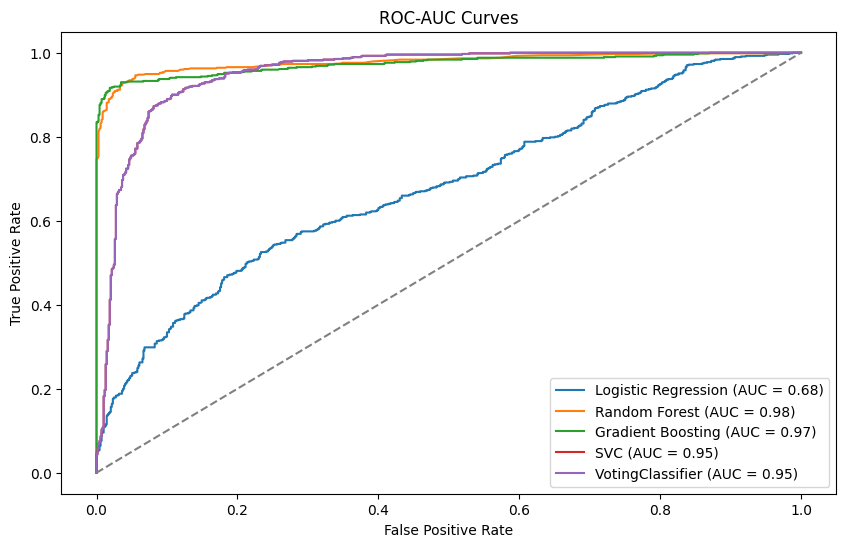

In [46]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC-AUC curve
def plot_roc_curve(model, X_test, y_test, label):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC-AUC curve for each model
plt.figure(figsize=(10, 6))

plot_roc_curve(best_lr, X_test, y_test, 'Logistic Regression')
plot_roc_curve(best_rf, X_test, y_test, 'Random Forest')
plot_roc_curve(best_gb, X_test, y_test, 'Gradient Boosting')
plot_roc_curve(best_svc, X_test, y_test, 'SVC')
plot_roc_curve(best_svc, X_test, y_test, 'VotingClassifier')




plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend(loc='lower right')
plt.show()


In [47]:
X_test

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,housing,loan,contact
132,-1.035193,0.401996,-0.699038,-0.312750,0.188996,0.296259,0.0,1.000000,3.000000,1.000000
4628,-1.551755,-0.763697,-1.340678,-1.511658,-1.378487,-1.279813,0.0,3.000000,2.906087,1.000000
2357,-0.293164,-0.763697,-0.699038,-0.312750,0.161920,0.296259,1.0,0.000000,6.000000,1.000000
2585,0.130852,-0.763697,-1.258167,-1.316725,-1.577125,-1.279813,1.0,1.000000,1.000000,1.000000
1669,1.190892,3.899074,0.747046,1.025884,0.642526,0.218026,4.0,0.000000,7.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5055,-1.283903,-0.180851,0.713953,0.191997,-1.904906,-2.908640,9.0,3.000000,3.884588,0.000000
1092,-1.035193,2.150535,-0.926697,-1.531863,-1.433743,-1.279813,0.0,1.000000,7.000000,1.000000
4746,1.586577,0.829067,-1.169576,-1.374224,-1.537655,-1.279813,6.0,0.267267,0.000000,0.267267
124,0.236856,2.150535,0.608630,-0.480079,0.707140,0.822703,0.0,1.000000,3.000000,1.000000


In [48]:
import pickle
with open('bank_marketing_predictor.sav', 'wb') as file:
    pickle.dump(best_rf, file)

In [91]:
import pickle
# Numeric veriler için scaler
scaler = StandardScaler()
scaler.fit(data[numeric_columns])  # Sadece sayısal sütunlar ile fit et

# Scaler'ı kaydetme
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)